In [1]:
def cmpr_feature_vect(feature_vector1,feature_vector2):
    
    dist = (abs(feature_vector1**2 - feature_vector2**2))**(0.5)

    for idx, val in enumerate(dist):
        if np.isnan(val):
            dist[idx] = 0

    dist = np.sum(dist)

    return dist

In [2]:
from scipy.io import loadmat
import os

dataDir = "/home/dunga/Desktop/AutoSIGN_Related_Stuff/test_train/mat_files_PUCPR/"
mats = []
strings = []
for file in os.listdir( dataDir ) :
    strings.append(str(file))
    mats.append( loadmat( dataDir+file ) )
    
    
from sets import Set

string_set = Set()

for string in strings:
    print(string)
    string_set.add(string)

real_151.mat
real_164.mat
real_51.mat
real_158.mat
real_25.mat
real_162.mat
real_10.mat
real_84.mat
real_80.mat
real_127.mat
real_86.mat
forg_47.mat
real_94.mat
real_20.mat
real_120.mat
real_56.mat
real_27.mat
forg_37.mat
forg_46.mat
real_53.mat
forg_29.mat
real_82.mat
forg_1.mat
real_109.mat
forg_19.mat
forg_42.mat
real_36.mat
forg_2.mat
forg_25.mat
real_143.mat
real_45.mat
forg_4.mat
real_110.mat
real_38.mat
forg_13.mat
real_43.mat
forg_53.mat
real_134.mat
real_131.mat
real_156.mat
real_77.mat
real_14.mat
real_166.mat
real_60.mat
real_1.mat
real_4.mat
real_150.mat
real_24.mat
forg_27.mat
real_142.mat
forg_31.mat
real_121.mat
forg_58.mat
real_157.mat
real_99.mat
real_7.mat
forg_49.mat
forg_17.mat
real_160.mat
real_30.mat
real_133.mat
forg_40.mat
real_59.mat
real_16.mat
forg_43.mat
real_54.mat
real_5.mat
real_136.mat
real_113.mat
forg_50.mat
real_52.mat
real_137.mat
real_12.mat
forg_60.mat
forg_28.mat
real_79.mat
forg_45.mat
forg_6.mat
real_103.mat
real_139.mat
real_83.mat
forg_55.mat


/home/dunga/anaconda3/envs/AutoSIGN/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: the sets module is deprecated
  if sys.path[0] == '':


In [3]:
from scipy.io import loadmat
import numpy as np

real_mat = np.zeros((168,40,2048))
forg_mat = np.zeros((60,20,2048))

for index in range(1,60):
    
    str_real = 'real'
    str_forg = 'forg'

    name_string = '{}_{}.mat'
    real_name = name_string.format(str_real,index)
    forg_name = name_string.format(str_forg,index)
    
    features_real = loadmat(dataDir+real_name)['features']
    features_forg = loadmat(dataDir+forg_name)['features']
        
    real_mat[index] = features_real
    forg_mat[index] = features_forg
    
for index in range(61,168):
    
    str_real = 'real'

    name_string = '{}_{}.mat'
    real_name = name_string.format(str_real,index)
    
    features_real = loadmat(dataDir+real_name)['features']
        
    real_mat[index] = features_real

In [4]:
distance_forg = []

for index in range (1,60):
        print(index)
        for index_2 in range(1,40):
            for index_3 in range(1,20):   
                dist = cmpr_feature_vect(forg_mat[index][index_3],real_mat[index][index_2])
                distance_forg.append(dist)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [5]:
distance_same = []

for index in range (1,168):
        print(index)
        for index_2 in range(1,40):
            for index_3 in range(1,40):
                if (index_2!=index_3):
                    dist = cmpr_feature_vect(real_mat[index][index_3],real_mat[index][index_2])
                    distance_same.append(dist)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167


In [11]:
np.shape(distance_same)
dist_same = np.array(distance_same)

print("Distance Same All")
print(dist_same.max())
print(dist_same.min())
dist_same_mean = dist_same.mean()
print(dist_same_mean)
print(dist_same.std())

distance_same_above = []
distance_same_below = []

for distance in dist_same:
    if(distance>dist_same_mean):
        distance_same_above.append(distance)
    else:
        distance_same_below.append(distance)
        

dist_same_above = np.array(distance_same_above)
dist_same_below = np.array(distance_same_below)

print("Distance Same Above")
print(dist_same_above.max())
print(dist_same_above.min())
print(dist_same_above.mean())
print(dist_same_above.std())

print("Distance Same Below")
print(dist_same_below.max())
print(dist_same_below.min())
print(dist_same_below.mean())
print(dist_same_below.std())

Distance Same All
2018.8006299
0.0
749.446545502
170.816669287
Distance Same Above
2018.8006299
749.451117215
885.681592576
139.732604994
Distance Same Below
749.442609323
0.0
637.891035074
97.1615217607


In [12]:
np.shape(distance_forg)
dist_forg = np.array(distance_forg)

print("Distance Forg All")
print(dist_forg.max())
print(dist_forg.min())
dist_forg_mean = dist_forg.mean()
print(dist_forg_mean)
print(dist_forg.std())

distance_forg_above = []
distance_forg_below = []

for distance in dist_forg:
    if(distance>dist_forg_mean):
        distance_forg_above.append(distance)
    else:
        distance_forg_below.append(distance)
        

dist_forg_above = np.array(distance_forg_above)
dist_forg_below = np.array(distance_forg_below)

print("Distance Forg Above")
print(dist_forg_above.max())
print(dist_forg_above.min())
print(dist_forg_above.mean())
print(dist_forg_above.std())

print("Distance Forg Below")
print(dist_forg_below.max())
print(dist_forg_below.min())
print(dist_forg_below.mean())
print(dist_forg_below.std())

Distance Forg All
2197.38364353
508.049419312
1143.81811633
238.006601163
Distance Forg Above
2197.38364353
1143.82021916
1345.84160129
153.178555213
Distance Forg Below
1143.81060239
508.049419312
958.902814853
124.376841526


In [8]:
distance_diff = []

for index in range (1,168):
    print(index)
    for index_2 in range(1,168):
        if (index_2!=index):
                    
            num = np.random.randint(1,24,2)
                    
            dist = cmpr_feature_vect(real_mat[index][num[0]],real_mat[index_2][num[1]])
            distance_diff.append(dist)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167


In [13]:
np.shape(distance_diff)
dist_diff = np.array(distance_diff)
print("Distance Diff All")
print(dist_diff.max())
print(dist_diff.min())
dist_diff_mean = dist_diff.mean()
print(dist_diff_mean)
print(dist_diff.std())

distance_diff_above = []
distance_diff_below = []

for distance in dist_diff:
    if(distance>dist_diff_mean):
        distance_diff_above.append(distance)
    else:
        distance_diff_below.append(distance)
        

dist_diff_above = np.array(distance_diff_above)
dist_diff_below = np.array(distance_diff_below)

print("Distance Diff Above")
print(dist_diff_above.max())
print(dist_diff_above.min())
print(dist_diff_above.mean())
print(dist_diff_above.std())

print("Distance Diff Below")
print(dist_diff_below.max())
print(dist_diff_below.min())
print(dist_diff_below.mean())
print(dist_diff_below.std())

Distance Diff All
2831.40646858
598.921078974
1445.34998144
306.157305824
Distance Diff Above
2831.40646858
1445.35206376
1709.729637
223.883843467
Distance Diff Below
1445.30389928
598.921078974
1225.25496676
152.988856271


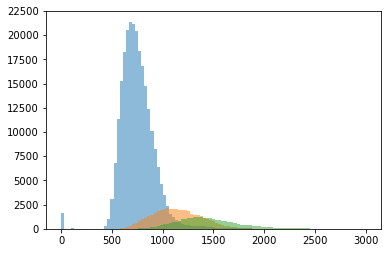

In [14]:
import numpy
import matplotlib.pyplot as plt

histogram=plt.figure()

bins = numpy.linspace(0, 3000, 100)

plt.hist(dist_same, bins, alpha=0.5)
plt.hist(dist_forg, bins, alpha=0.5)
plt.hist(dist_diff, bins, alpha=0.5)
plt.show()